<h2>Airbnb Listings & Pricing Analysis: Insights Through Data</h2>
This notebook provides a comprehensive exploratory analysis of Airbnb listings, combining data manipulation with NumPy and Pandas and insightful visualizations using Matplotlib and Seaborn. We explore pricing trends, review patterns, and availability across room types and neighborhoods, uncover correlations, and create derived features like price_range and recent_review flags. The goal is to extract actionable insights that reveal what drives Airbnb pricing and listing behavior, making this analysis both informative and visually engaging for data-driven storytelling.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv('/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv')
data.head()

/tmp/ipykernel_55/797836533.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [10]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [11]:
data['service fee']=data['service fee'].astype(str).str.replace("$","",regex=False).str.replace(",","",regex=False).replace('nan', None).astype(float)


In [12]:


data['price']=data['price'].astype(str).str.replace('$',"",regex=False).str.replace(",","",regex=False).astype(float)


In [13]:
#What % of listings have last_review missing
condition = data['last review'].isna() & (data['number of reviews'] == 0)
condition.mean() * 100


np.float64(15.335432119221434)

In [14]:
data['last review'] = data['last review'].replace(0, np.nan)
#are missing reviews correlated with price
(data['last review'].isna() & (data['number of reviews'] == 0)).mean() * 100


np.float64(15.335432119221434)

In [15]:
data[['last review', 'number of reviews']].head()


,last review,number of reviews
0,10/19/2021,9.0
1,5/21/2022,45.0
2,NaN,0.0
3,7/5/2019,270.0
4,11/19/2018,9.0


In [16]:
data.groupby(data['last review'].notna())['price'].median()

last review
False    621.0
True     625.0
Name: price, dtype: float64

In [17]:
data.groupby(['room type', data['last review'].notna()])['price'].mean()


room type        last review
Entire home/apt  False          628.983406
                 True           624.413981
Hotel room       True           668.465517
Private room     False          611.644784
                 True           627.590623
Shared room      False          644.159449
                 True           631.153216
Name: price, dtype: float64

In [18]:
data.groupby(data['last review'].notna())['number of reviews'].mean()

last review
False     0.159110
True     32.456588
Name: number of reviews, dtype: float64

Analysis shows that listings with reviews have a slightly higher average price (₹626) compared to listings without reviews (₹621). However, the difference is marginal, suggesting that reviews alone do not significantly influence pricing. Other factors such as location and room type likely play a stronger role

In [19]:
#Compare Price vs Room Type
data.groupby(data['room type'])['price'].median().sort_values(ascending=False)

room type
Shared room        651.0
Hotel room         644.5
Entire home/apt    624.0
Private room       623.0
Name: price, dtype: float64

In [20]:
data['room type'].value_counts()


room type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64

In [21]:
data.groupby('room type')['price'].describe()


,count,mean,std,min,25%,50%,75%,max
room type,,,,,,,,
Entire home/apt,53568.0,625.082232,331.713213,50.0,339.0,624.0,914.00,1200.0
Hotel room,116.0,668.465517,310.866487,50.0,424.0,644.5,937.25,1193.0
Private room,46450.0,625.007363,331.332129,50.0,341.0,623.0,910.75,1200.0
Shared room,2218.0,634.132101,338.701626,50.0,323.5,651.0,927.00,1199.0


While hotel rooms show the highest average price, the price difference across room types is minimal. Surprisingly, shared rooms are priced higher than private rooms, which contradicts typical Airbnb pricing patterns. This suggests potential data quality issues or the presence of significant outliers affecting the mean.”

In [22]:
data['availability 365']

0         286.0
1         228.0
2         352.0
3         322.0
4         289.0
          ...  
102594    227.0
102595    395.0
102596    342.0
102597    386.0
102598     69.0
Name: availability 365, Length: 102599, dtype: float64

In [23]:
data.groupby('room type')['availability 365'].mean().sort_values(ascending=False)

room type
Hotel room         218.310345
Shared room        172.666214
Entire home/apt    142.760376
Private room       137.557126
Name: availability 365, dtype: float64

“Analysis of availability by room type shows that private rooms and entire homes have the lowest average availability, indicating higher occupancy. Hotel rooms have the highest availability, suggesting comparatively lower demand in the Airbnb market.”

In [24]:
data.groupby('room type')[['price', 'availability 365']].mean().sort_values('price',ascending=False)


,price,availability 365
room type,,
Hotel room,668.465517,218.310345
Shared room,634.132101,172.666214
Entire home/apt,625.082232,142.760376
Private room,625.007363,137.557126


In [25]:
data['neighbourhood group']

0          Brooklyn
1         Manhattan
2         Manhattan
3          Brooklyn
4         Manhattan
            ...    
102594     Brooklyn
102595    Manhattan
102596     Brooklyn
102597       Queens
102598    Manhattan
Name: neighbourhood group, Length: 102599, dtype: object

In [26]:
data.groupby('neighbourhood group')[['price','availability 365']].mean().sort_values(by='price',ascending=False)

,price,availability 365
neighbourhood group,,
Queens,630.207647,161.851235
Bronx,627.766359,179.040059
Brooklyn,626.562193,129.809233
Staten Island,624.490546,197.270440
Manhattan,622.440227,142.078898
brookln,580.000000,47.000000
manhatan,460.000000,325.000000


In [27]:
data['neighbourhood group'].value_counts()


neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64

In [28]:
#Does availability decrease as the number of reviews increases?
data[['number of reviews', 'availability 365']].corr()


,number of reviews,availability 365
number of reviews,1.000000,0.099368
availability 365,0.099368,1.000000


In [29]:

bins = [0, 10, 50, 100, 500, 1000]
data.groupby(pd.cut(data['number of reviews'], bins))['availability 365'].mean()


/tmp/ipykernel_55/2005265700.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(pd.cut(data['number of reviews'], bins))['availability 365'].mean()


number of reviews
(0, 10]        129.398247
(10, 50]       145.786055
(50, 100]      158.781491
(100, 500]     177.835986
(500, 1000]    239.342105
Name: availability 365, dtype: float64

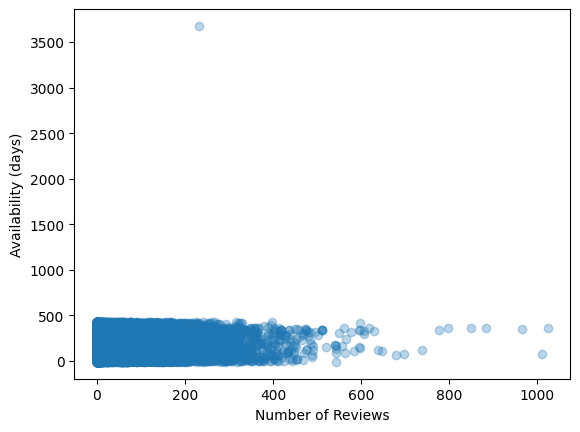

In [30]:
import matplotlib.pyplot as plt
plt.scatter(data['number of reviews'], data['availability 365'], alpha=0.3)
plt.xlabel('Number of Reviews')
plt.ylabel('Availability (days)')
plt.show()


In [31]:
data['last review'].isna()

0         False
1         False
2          True
3         False
4         False
          ...  
102594     True
102595    False
102596     True
102597    False
102598     True
Name: last review, Length: 102599, dtype: bool

In [32]:
data['last review']=pd.to_datetime(data['last review'],errors='coerce')

In [33]:
data['last review'].dtype
data['last review'].isna().mean() * 10

np.float64(1.5490404389906334)

In [34]:
data['review_year'] = data['last review'].dt.year
data['review_month'] = data['last review'].dt.month


In [35]:
data[['last review', 'review_year', 'review_month']].head()


,last review,review_year,review_month
0,2021-10-19,2021.0,10.0
1,2022-05-21,2022.0,5.0
2,NaT,NaN,NaN
3,2019-07-05,2019.0,7.0
4,2018-11-19,2018.0,11.0


In [36]:
data['review_year'].value_counts().sort_index()

review_year
2012.0       26
2013.0       80
2014.0      246
2015.0     1874
2016.0     4316
2017.0     6601
2018.0    11455
2019.0    42931
2020.0     2063
2021.0     6740
2022.0    10369
2024.0        1
2025.0        1
2026.0        1
2040.0        1
2058.0        1
Name: count, dtype: int64

In [37]:
data['review_month'].value_counts().sort_index()


review_month
1.0      8909
2.0      7200
3.0      3862
4.0      4032
5.0      8654
6.0     23634
7.0     10486
8.0      3774
9.0      3641
10.0     3819
11.0     3251
12.0     5444
Name: count, dtype: int64

In [38]:
data = data[data['review_year'] <= 2022]


In [39]:
data['review_year'].value_counts().sort_index()

review_year
2012.0       26
2013.0       80
2014.0      246
2015.0     1874
2016.0     4316
2017.0     6601
2018.0    11455
2019.0    42931
2020.0     2063
2021.0     6740
2022.0    10369
Name: count, dtype: int64

“Review activity increased steadily from 2015 and peaked in 2019, reflecting Airbnb’s rapid growth before the pandemic. A sharp decline is observed in 2020, consistent with global travel restrictions. Seasonality analysis shows June as the most active month for reviews, highlighting summer as the peak travel period.”

In [40]:
reference_date = pd.Timestamp('2022-12-31')

data['has_recent_review'] = (
    data['last review'].notna() &
    (reference_date - data['last review'] <= pd.Timedelta(days=365))
)


In [41]:
data['has_recent_review'].value_counts()


has_recent_review
False    76159
True     10542
Name: count, dtype: int64

In [42]:
data.groupby('has_recent_review')[['price','availability 365','number of reviews']].mean()

,price,availability 365,number of reviews
has_recent_review,,,
False,625.740496,136.276502,29.780276
True,628.121833,183.932218,51.769968


“Listings with recent reviews show significantly higher review counts, confirming active engagement. However, these listings also exhibit higher availability, suggesting that calendar availability is more influenced by host behavior than demand alone. Pricing remains largely unaffected by recent review activity.”

In [43]:
data['price_range'] = pd.qcut(
    data['price'],
    q=4,
    labels=['Budget', 'Mid-Low', 'Mid-High', 'Premium']
)


In [44]:
data['price_range'].value_counts()


price_range
Mid-Low     21656
Mid-High    21650
Budget      21625
Premium     21549
Name: count, dtype: int64

In [45]:
data.groupby('price_range')[['price', 'number of reviews', 'availability 365']].mean()


/tmp/ipykernel_55/1750315105.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('price_range')[['price', 'number of reviews', 'availability 365']].mean()


,price,number of reviews,availability 365
price_range,,,
Budget,195.040416,32.037246,142.655820
Mid-Low,483.684752,32.792421,141.639271
Mid-High,769.117644,32.096713,141.399102
Premium,1057.836187,32.935831,142.525479


“Analysis across price quartiles shows that demand indicators such as review count and availability remain nearly constant regardless of price level. This suggests that Airbnb demand in this dataset is largely price-inelastic, with premium listings generating higher revenue primarily through pricing rather than increased occupancy.”

In [46]:
data['price'].describe()


count    86480.000000
mean       626.030701
std        331.655599
min         50.000000
25%        340.000000
50%        625.000000
75%        914.000000
max       1200.000000
Name: price, dtype: float64

In [47]:
data['price'].quantile([0.90, 0.95, 0.99])


0.90    1086.0
0.95    1143.0
0.99    1188.0
Name: price, dtype: float64

In [48]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound



(np.float64(-521.0), np.float64(1775.0))

<h1>VISUALISATION</h1>

In [49]:
data['price'].describe()

count    86480.000000
mean       626.030701
std        331.655599
min         50.000000
25%        340.000000
50%        625.000000
75%        914.000000
max       1200.000000
Name: price, dtype: float64

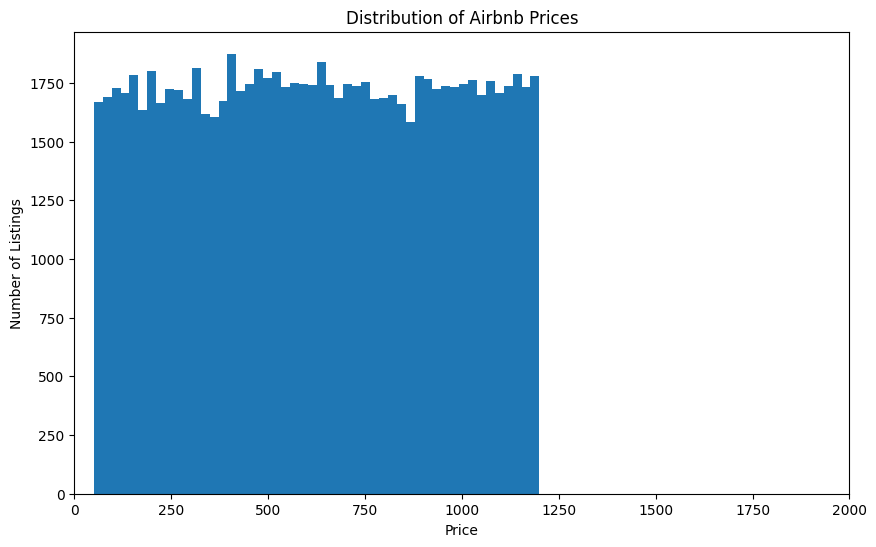

In [50]:
plt.figure(figsize=(10,6))
plt.hist(data['price'],bins=50)

plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('Number of Listings')

plt.xlim(0,2000)
plt.show()

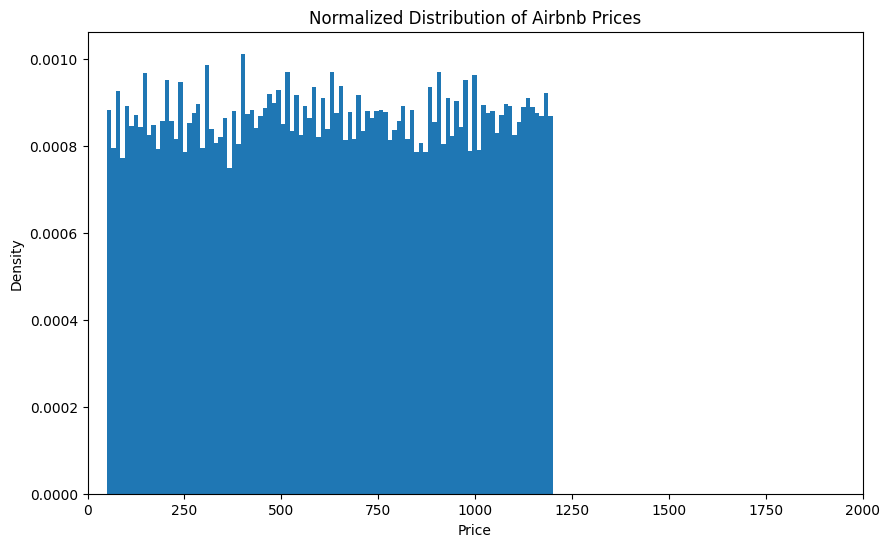

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=100, density=True)

plt.title('Normalized Distribution of Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.xlim(0, 2000)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

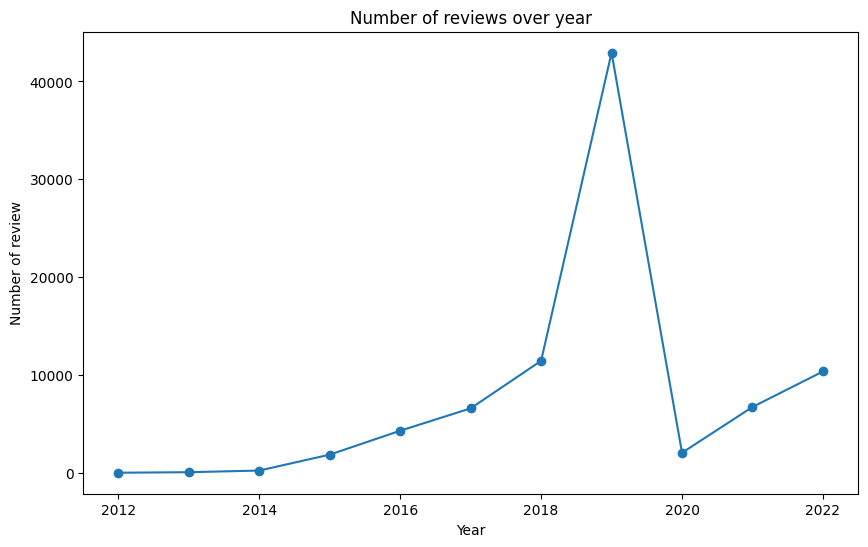

In [52]:
#When did Airbnb grow rapidly?
#Are there drops (COVID effect)?
#Is activity increasing or declining?
review_per_year = data.groupby('review_year').size()

plt.figure(figsize=(10,6))
plt.plot(review_per_year.index,review_per_year.values,marker='o')

plt.title('Number of reviews over year')
plt.xlabel('Year')
plt.ylabel('Number of review')
plt.show

“The line plot shows a gradual increase in Airbnb reviews from 2012, followed by rapid growth until 2019. A sharp decline is observed in 2020, likely due to the COVID-19 pandemic. Post-2020, reviews begin to recover, indicating renewed demand.”

<function matplotlib.pyplot.show(close=None, block=None)>

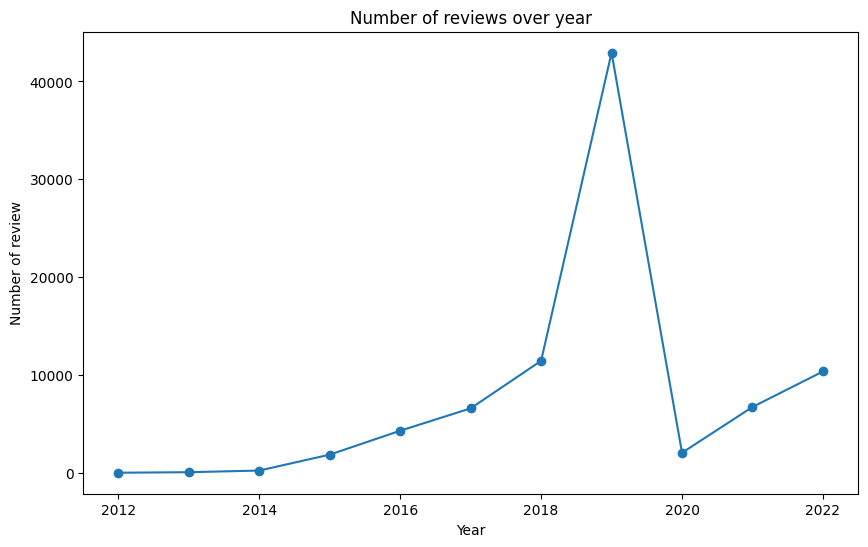

In [53]:
plt.figure(figsize=(10,6))
plt.plot(review_per_year.index,review_per_year.values,marker='o')

plt.title('Number of reviews over year')
plt.xlabel('Year')
plt.ylabel('Number of review')
plt.show

In [54]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license', 'review_year',
       'review_month', 'has_recent_review', 'price_range'],
      dtype='object')

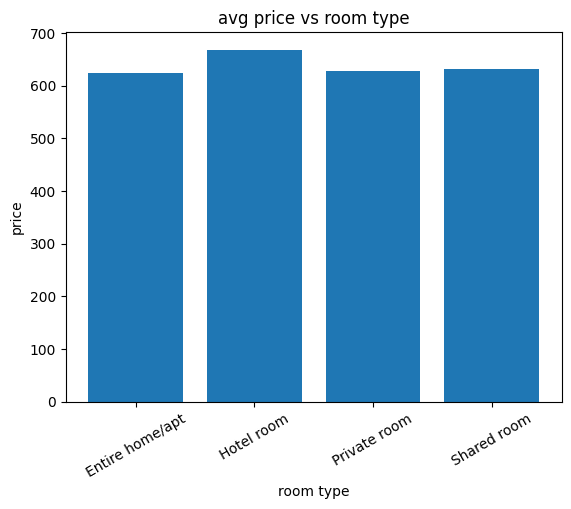

In [55]:
avg_price=data.groupby('room type')['price'].mean()
plt.title('avg price vs room type')
plt.xlabel('room type')
plt.ylabel('price')
plt.bar(avg_price.index,avg_price.values)

plt.xticks(rotation=30)   # important for readability
plt.show()


“The bar chart shows that hotel rooms and entire homes/apartments have higher average prices compared to private and shared rooms. Shared rooms are the least expensive, reflecting their limited privacy and amenities.”

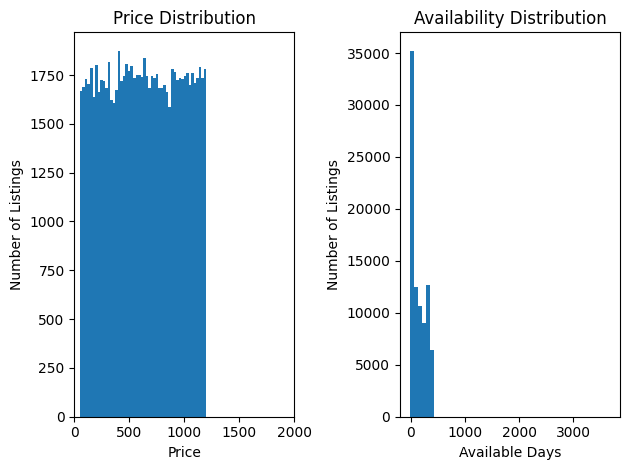

In [56]:
fig, axes = plt.subplots(1, 2)

axes[0].hist(data['price'], bins=50)
axes[0].set_title('Price Distribution')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Number of Listings')
axes[0].set_xlim(0, 2000)

# Plot 2: Availability histogram
axes[1].hist(data['availability 365'], bins=50)
axes[1].set_title('Availability Distribution')
axes[1].set_xlabel('Available Days')
axes[1].set_ylabel('Number of Listings')

plt.tight_layout()
plt.show()


“The subplot comparison shows that while prices are spread across a wide range, availability is more concentrated, indicating that many listings are available for a similar number of days per year. This suggests relatively consistent host availability despite varied pricing.”

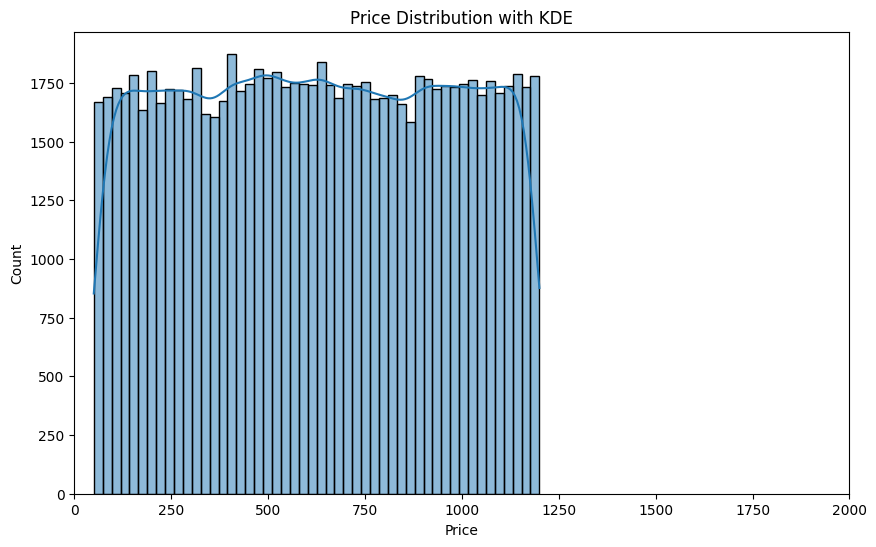

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(
    data['price'],
    bins=50,
    kde=True
)

plt.title('Price Distribution with KDE')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xlim(0, 2000)

plt.show()

“The histogram with KDE shows a relatively smooth and evenly spread price distribution with a slight right skew. The KDE curve indicates no sharp peaks, supporting the observation that listings are spread across multiple price ranges rather than concentrated at a single price point.”

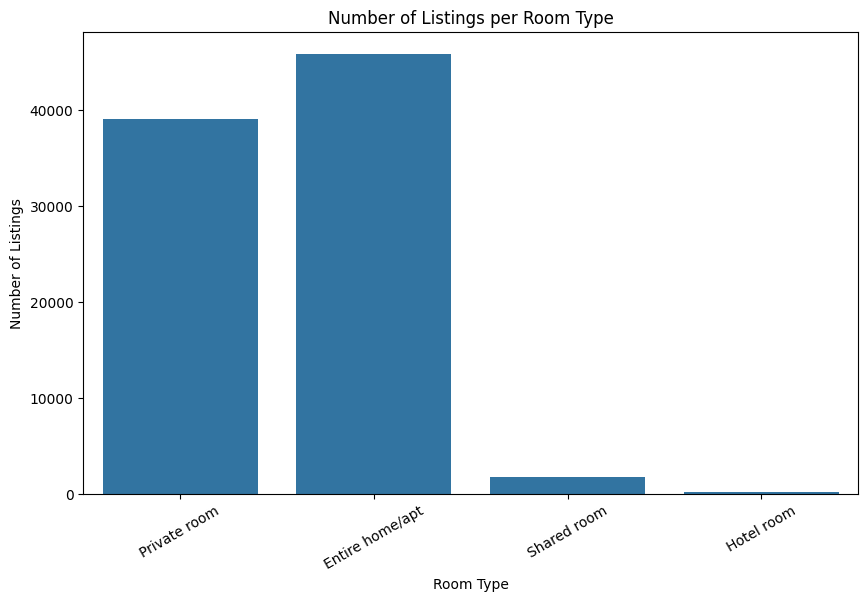

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(
    x='room type',
    data=data
)

plt.title('Number of Listings per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')

plt.xticks(rotation=30)
plt.show()

“The countplot shows that entire homes/apartments and private rooms dominate the dataset, while shared rooms and hotel rooms are relatively less common. This indicates that most Airbnb listings cater to guests seeking private or entire accommodations.”

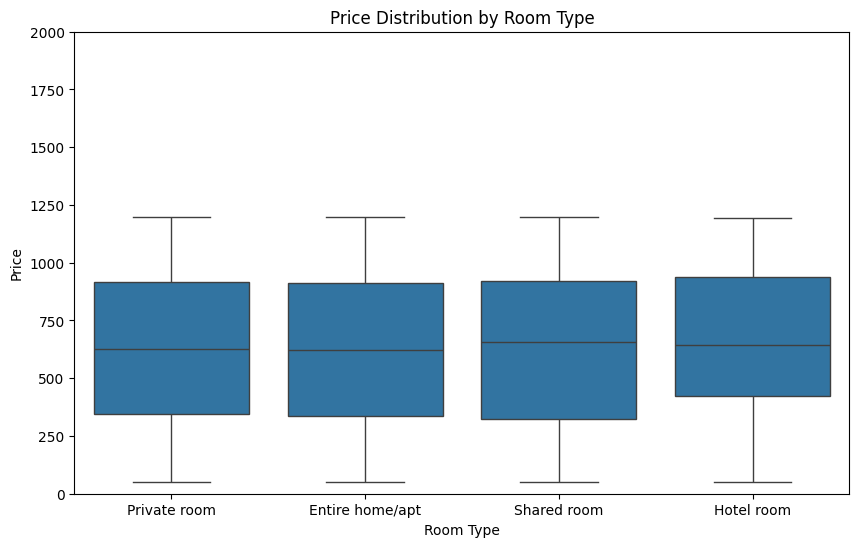

In [59]:
plt.figure(figsize=(10,6))

sns.boxplot(
    x='room type',
    y='price',
    data=data
)

plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')

plt.ylim(0, 2000)   # improves readability
plt.show()

/tmp/ipykernel_55/2816458702.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


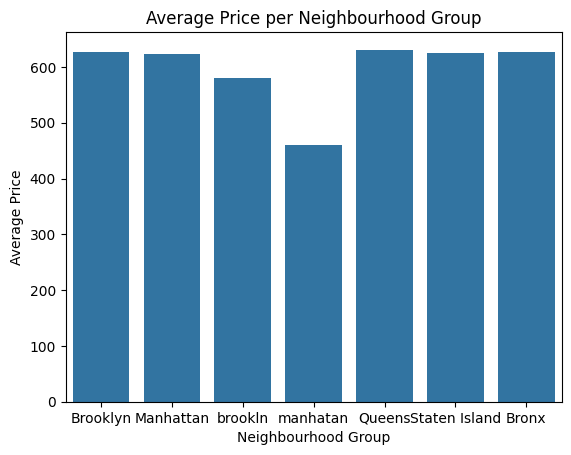

In [60]:
sns.barplot(
    x='neighbourhood group',
    y='price',
    data=data,
    ci=None
)

plt.title('Average Price per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')

plt.show()

“The barplot shows variation in average Airbnb prices across neighbourhood groups.Brooklyn exhibit higher average prices compared to other areas, reflecting higher demand and central locations.manhatan exhibits lowest average price among all”

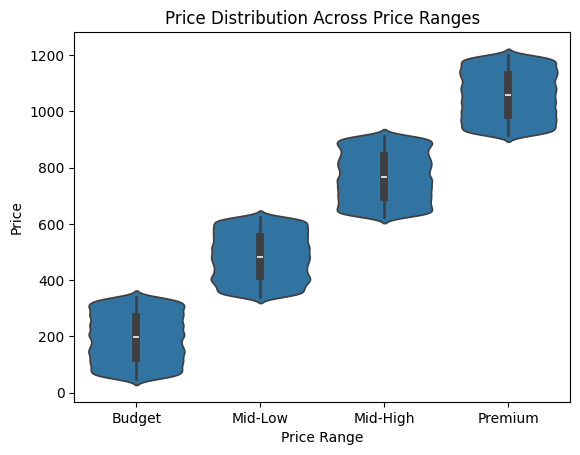

In [61]:
sns.violinplot(
    x='price_range',
    y='price',
    data=data
)

plt.title('Price Distribution Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Price')

plt.show()

“The violin plot shows that while price ranges are distinct, the internal distribution within each category is relatively symmetric. This confirms that the price-based categorization effectively separates listings without extreme overlap.”

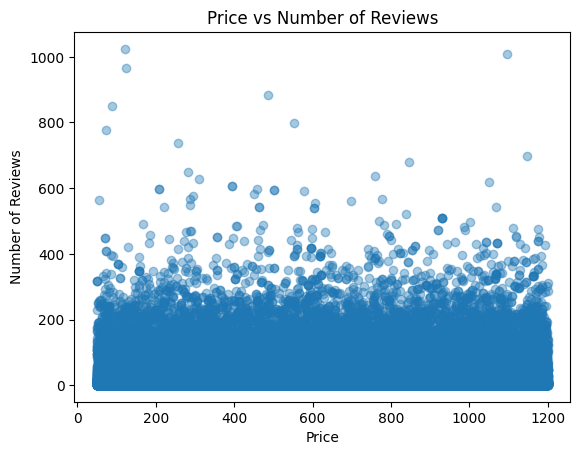

In [62]:
plt.scatter(
    data['price'],
    data['number of reviews'],
    alpha=0.4
)

plt.title('Price vs Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')

plt.show()

“The scatter plot shows no strong relationship between price and number of reviews. Listings across all price ranges receive similar numbers of reviews, indicating that demand is not strongly driven by price.”

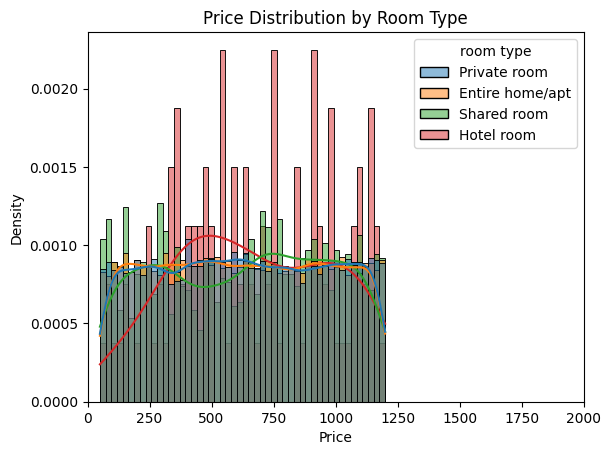

In [63]:
sns.histplot(
    data=data,
    x='price',
    hue='room type',
    bins=50,
    kde=True,
    stat='density',
    common_norm=False,
    alpha=0.5
)

plt.title('Price Distribution by Room Type')
plt.xlabel('Price')
plt.ylabel('Density')
plt.xlim(0, 2000)

plt.show()

“The histogram shows distinct price distributions across room types. Entire homes and hotel rooms tend to have distributions shifted toward higher prices, while private and shared rooms are concentrated at lower price ranges. Despite overlap, the overall distribution patterns differ clearly by room type.”

In [64]:
corr_matrix = data[['price', 'number of reviews', 'availability 365']].corr()
corr_matrix


,price,number of reviews,availability 365
price,1.000000,0.004611,-0.000336
number of reviews,0.004611,1.000000,0.107911
availability 365,-0.000336,0.107911,1.000000


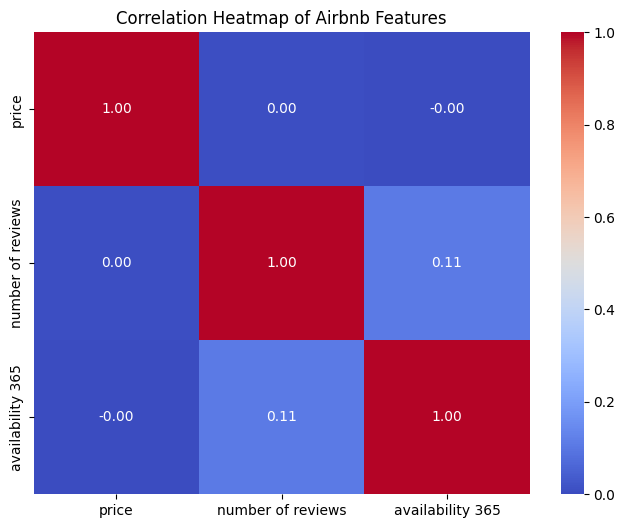

In [65]:
plt.figure(figsize=(8, 6))

sns.heatmap(
    corr_matrix,
    annot=True,        # show values
    cmap='coolwarm',   # color scale
    fmt='.2f'
)

plt.title('Correlation Heatmap of Airbnb Features')
plt.show()

“The correlation heatmap shows that price has almost no linear relationship with either number of reviews or availability. A weak positive correlation exists between number of reviews and availability, indicating that listings with more reviews tend to be slightly more available. Overall, demand-related metrics are largely independent of price.”

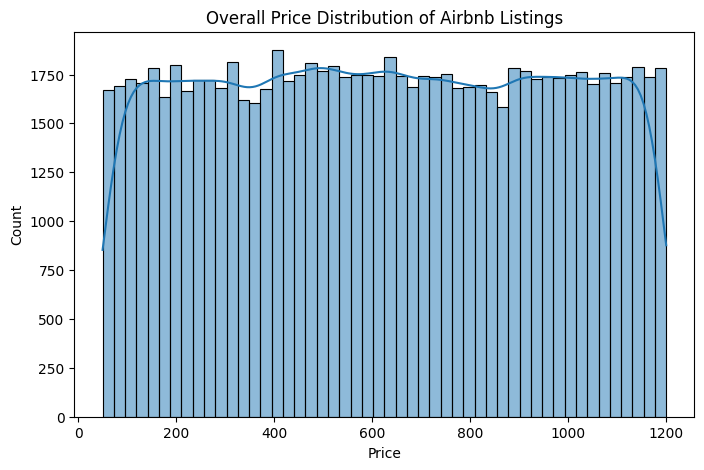

In [66]:


plt.figure(figsize=(8, 5))

sns.histplot(
    data=data,
    x='price',
    bins=50,
    kde=True
)

plt.title('Overall Price Distribution of Airbnb Listings')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

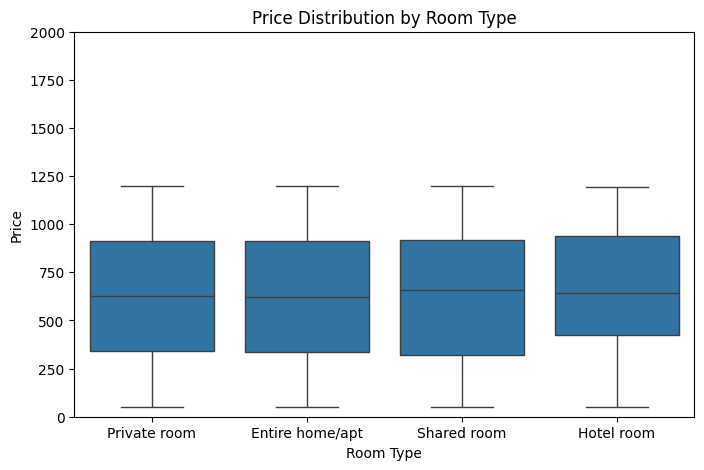

In [67]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=data,
    x='room type',
    y='price'
)

plt.ylim(0, 2000)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


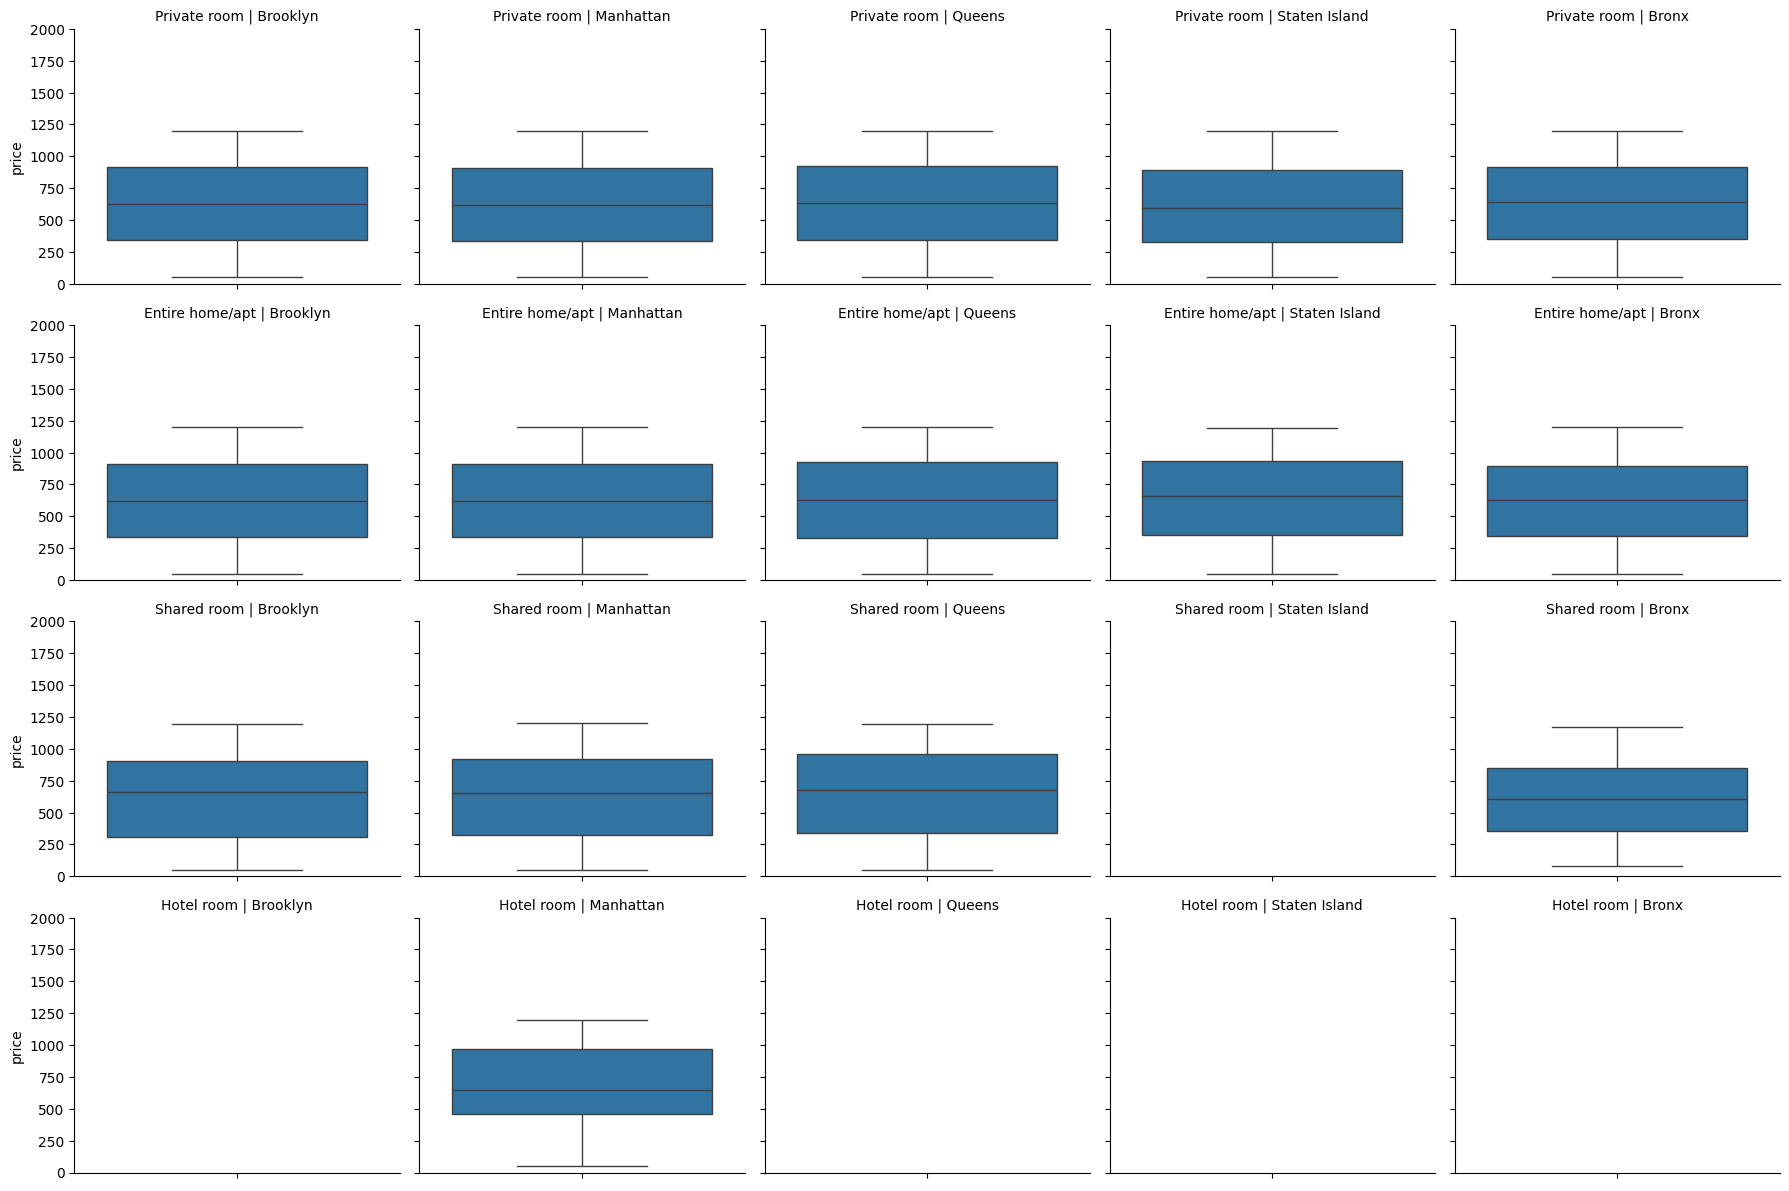

In [68]:
filtered = (
    data.groupby(['room type', 'neighbourhood group'])
        .filter(lambda x: len(x) > 20)
)

g = sns.FacetGrid(
    filtered,
    row='room type',
    col='neighbourhood group',
    height=3,
    aspect=1.2
)

g.map_dataframe(
    sns.boxplot,
    y='price'
)

g.set(ylim=(0, 2000))
g.set_titles('{row_name} | {col_name}')
plt.show()


“The Airbnb price distribution is right-skewed, with most listings clustered in the mid-price range and a small number of premium listings. Prices vary significantly by room type, with entire homes and hotel rooms commanding higher median prices than private or shared rooms. Geographic segmentation further reveals that Manhattan consistently exhibits higher prices across all room types, while outer boroughs display more compressed and affordable price ranges. Together, these patterns indicate that both accommodation type and location are key drivers of Airbnb pricing.”